In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

solar = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역1\\구역1_태양광.csv',
                     encoding='utf-8')
charger = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\클러스터링\\구역1\\구역1_충전소.csv',
                     encoding='cp949')

In [2]:
add_list = charger['주소']
add_list = add_list.tolist()
len(add_list)

809

In [3]:
import requests
import json

def getLatLng(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    headers = {"Authorization": "KakaoAK "+""}
    result = json.loads(str(requests.get(url, headers=headers).text))
    status_code = requests.get(url, headers=headers).status_code
    if(status_code != 200):
        print(f"ERROR: Unable to call rest api, http_status_coe: {status_code}")
        return 0
    

    try:
        match_first = result['documents'][0]['address']
        lon = match_first['x']
        lat = match_first['y']

        return lat, lon
    except IndexError: 
        return 0
    except TypeError: 
        return 0
    
location = []
for i in add_list:
    getLatLng(i)
    location.append(getLatLng(i))

In [7]:
for i in range(len(location)):
    #location[i] = list(location[i])
    try:
        location[i] = list(location[i])
    except TypeError:
        location[i] = [0,0]

In [8]:
y = []
for i in range(len(location)):
    y.append(location[i][0])
    
x=[]
for i in range(len(location)):
    x.append(location[i][1])

In [9]:
x_ = x
y_ = y

In [20]:
charger['y'] = y
charger['x'] = x
charger_copy = charger.copy()
charger_copy

,주소,y,x
0,서울특별시 강남구 남부순환로3104,37.4956786590374,127.071912029293
1,서울특별시 강남구 개포로 621,37.4941313928275,127.078783141187
2,서울특별시 송파구 양재대로 932,37.4945376921828,127.108713599026
3,서울특별시 강남구 삼성로 628,37.5159106576619,127.05214255205
4,서울특별시 강남구 선릉로108길 27,37.5103126002296,127.04637956875
...,...,...,...
804,서울특별시 강남구 테헤란로29길 5,37.5019677255362,127.03872448505
805,서울특별시 동작구 보라매로5길 20보라매병원_행복관 지상2층(425 서울특별시보라매...,37.493013748157,126.924332456243
806,서울특별시 동작구 장승배기로 161(47-2 동작구청),37.51252777344,126.939942092863
807,서울특별시 송파구 송파대로37길 77(가락동 910),37.4988841772964,127.104383431798


In [22]:
charger_copy.to_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\charger_loc__.csv',
                       encoding='cp949')

In [5]:
charger_new = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역1\\구역1_충전소.csv',
                     encoding='cp949')

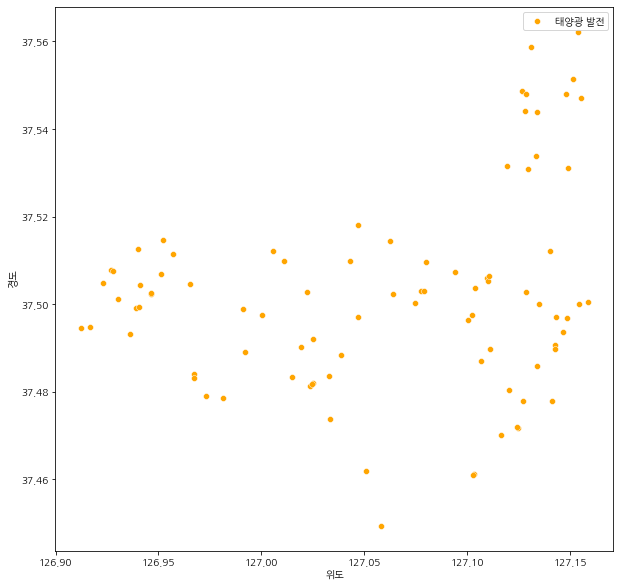

In [9]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
#sns.scatterplot(data=charger_new, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()

In [10]:
import folium

lat = solar['y'].mean()
long = solar['x'].mean()

m = folium.Map([lat,long],zoom_start=9)

In [11]:
for i in solar.index:
    tmp_lat =  solar.loc[i,'y']
    tmp_long = solar.loc[i,'x']
    
    folium.Marker([tmp_lat,tmp_long],icon=folium.Icon(color='orange')).add_to(m)

for i in charger_new.index:
    tmp_lat_02 =  charger_new.loc[i,'y']
    tmp_long_02 = charger_new.loc[i,'x']
    
    folium.Marker([tmp_lat_02,tmp_long_02],icon=folium.Icon(color='green')).add_to(m)

#m

In [14]:
import scipy as sp
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# centroids_new = centroids[['y','x']]
# distance = sp.spatial.distance.cdist(solar[['y','x']], centroids_new, "euclidean")

# cluster_num = np.argmin(distance, axis=1)

# result = solar.copy()
# result['cluster'] = np.array(cluster_num)
# result

In [43]:
charger_clu = charger_new[['y','x']]
model_ch = KMeans(n_clusters = 2, algorithm = 'auto')
model_ch.fit(charger_clu)
predict=pd.DataFrame(model_ch.predict(charger_clu))
predict.columns=['predict']

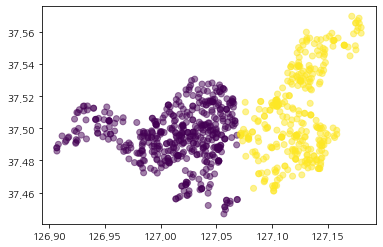

In [44]:
r = pd.concat([charger_clu,predict],axis=1)

plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)

In [45]:
solar_clu = solar[['y','x']]
model_so = KMeans(n_clusters = 2, algorithm = 'auto')
model_so.fit(solar_clu)
predict_solar=pd.DataFrame(model_so.predict(solar_clu))
predict_solar.columns=['predict']

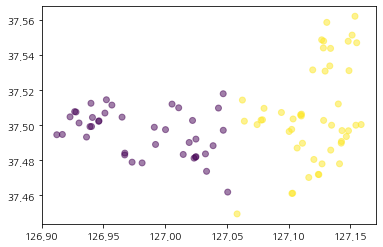

In [46]:
r_solar = pd.concat([solar_clu,predict_solar],axis=1)

plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)

# Elbow 기법

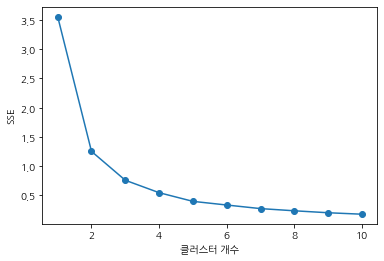

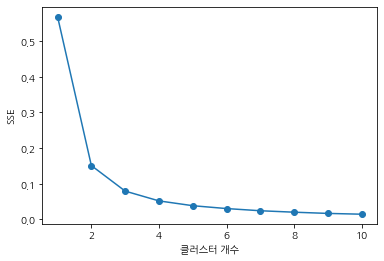

In [38]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++',random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
elbow(charger_clu)
elbow(solar_clu)

# Silhouette 기법

In [42]:
from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(solar_clu)
    clusters = kmeans.predict(solar_clu)
    
    score = silhouette_score(solar_clu, clusters)
    print('k: ',k,'score: ',score)
    
    if score>best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n: ',best_n, 'best score: ',best_silhouette_score)

k:  2 score:  0.607057608964179
k:  3 score:  0.5498518897425749
k:  4 score:  0.523530400535599
k:  5 score:  0.5189387421823073
k:  6 score:  0.4827450489219918
k:  7 score:  0.48546828008971493
k:  8 score:  0.5136599385814336
k:  9 score:  0.5177858606281097
k:  10 score:  0.5014510809861202
k:  11 score:  0.5073869136995782
k:  12 score:  0.48096277408038046
k:  13 score:  0.4990424063372684
k:  14 score:  0.479417498369094
k:  15 score:  0.4912180110963028
k:  16 score:  0.4611053354893277
k:  17 score:  0.48187403031010684
k:  18 score:  0.43896827955543166
k:  19 score:  0.46641845771381085
k:  20 score:  0.45341378092998935
k:  21 score:  0.4475035961814825
k:  22 score:  0.46496742873811725
k:  23 score:  0.45119534661231886
k:  24 score:  0.474678416056241
k:  25 score:  0.4435733864555617
k:  26 score:  0.4492174237046706
k:  27 score:  0.4522227473030382
k:  28 score:  0.46038808715685353
k:  29 score:  0.45921544153634114
best n:  2 best score:  0.607057608964179


(array([127.  , 127.02, 127.04, 127.06, 127.08, 127.1 , 127.12, 127.14]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

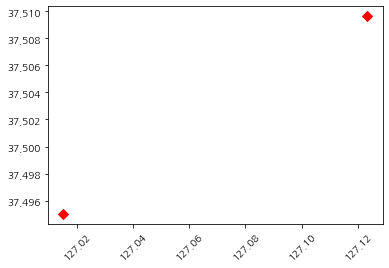

In [47]:
centers_charger = pd.DataFrame(model_ch.cluster_centers_,columns=['y','x'])
center_x = centers_charger['x']
center_y = centers_charger['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xticks(rotation='45')

(array([126.96, 126.98, 127.  , 127.02, 127.04, 127.06, 127.08, 127.1 ,
        127.12, 127.14]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

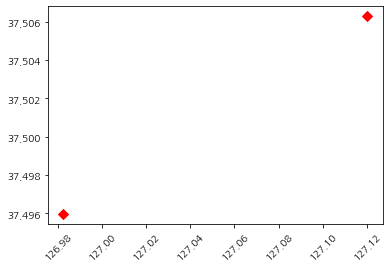

In [48]:
centers_solar = pd.DataFrame(model_so.cluster_centers_,columns=['y','x'])
center_x_solar = centers_solar['x']
center_y_solar = centers_solar['y']
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.xticks(rotation='45')

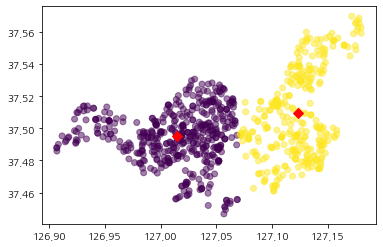

In [49]:
#충전소
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

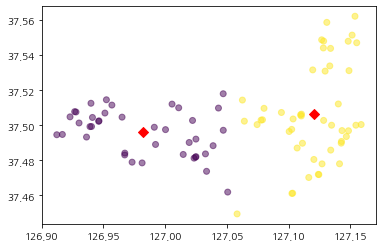

In [50]:
#태양광
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')

중점:37.50172916126675, 127.06021347111223


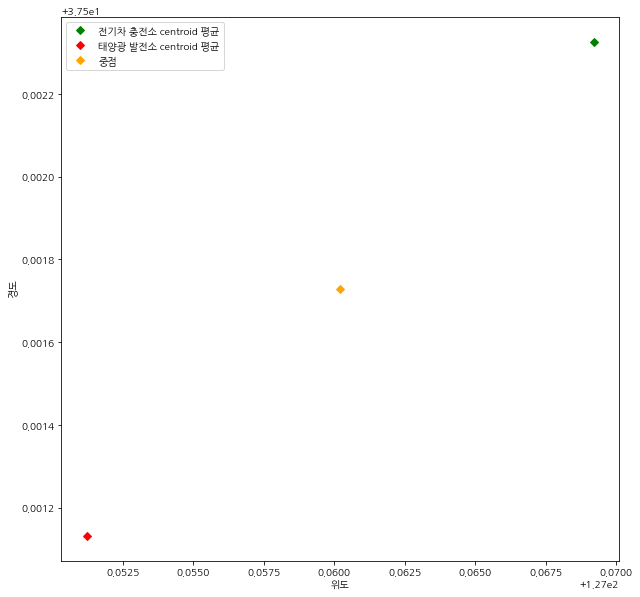

In [51]:
center_x_list = np.array(center_x)
center_y_list = np.array(center_y)

center_x_solar_list = np.array(center_x_solar)
center_y_solar_list = np.array(center_y_solar)

c_x = center_x_list.mean()
c_y = center_y_list.mean()

c_x_s = center_x_solar_list.mean()
c_y_s = center_y_solar_list.mean()

mean_x = (c_x+c_x_s)/2
mean_y = (c_y+c_y_s)/2

print('중점:{0}, {1}'.format(mean_y,mean_x))

fig = plt.figure(figsize=(10,10))
plt.plot(c_x,c_y,'D',color='green',label='전기차 충전소 centroid 평균')
plt.plot(c_x_s, c_y_s, 'D',color= 'red',label='태양광 발전소 centroid 평균')
plt.plot(mean_x, mean_y,'D', color='orange',label='중점')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()
plt.show()




# new_center_x = []
# new_center_y = []

# for i in range(5):
#     new_center_x.append((center_x_list[i]+center_x_solar_list[i])/2.0)
#     new_center_y.append((center_y_list[i]+center_y_solar_list[i])/2.0)

# print("x좌표:{}".format(new_center_x))
# print("y좌표:{}".format(new_center_y))
# fig = plt.figure(figsize=(10,10))
# sns.scatterplot(x=new_center_x, y = new_center_y, s=50)
# plt.xticks(rotation='45')
#강남구

In [52]:
print("{}, {}".format(c_y_s, c_x_s))

37.501131609125, 127.05122127895834


In [53]:
#서초구 37.4837 127.0324
#강남구 37.5172 127.0473
#송파구 37.5145 127.1066
#강동구 37.5301 127.1238
#동작구 37.5124 126.9393

seocho_y = 37.4837
seocho_x = 127.0324
s = []
s.append(seocho_y)
s.append(seocho_x)

gangnam_y = 37.5172 
gangnam_x = 127.0473
g = []
g.append(gangnam_y)
g.append(gangnam_x)

songpa_y = 37.5145
songpa_x = 127.1066
so = []
so.append(songpa_y)
so.append(songpa_x)

gangdong_y = 37.5301
gangdong_x = 127.1238
gd = []
gd.append(gangdong_y)
gd.append(gangdong_x)

dongjak_y = 37.5124
dongjak_x = 126.9393
jak = []
jak.append(dongjak_y)
jak.append(dongjak_x)

area = []
area.append(s)
area.append(g)
area.append(so)
area.append(gd)
area.append(jak)

area

[[37.4837, 127.0324],
 [37.5172, 127.0473],
 [37.5145, 127.1066],
 [37.5301, 127.1238],
 [37.5124, 126.9393]]

In [54]:
import math

line = []

for i in range(len(area)):
    dist = math.sqrt((c_y_s-area[i][0])**2+(c_x_s-area[i][1])**2)
    line.append(dist)
line

[0.02565348978822223,
 0.01653993996304147,
 0.056969435830076014,
 0.07814626298122467,
 0.11248710733493482]

In [55]:
print("태양광 최적입지 좌표:{}, {}".format(c_y_s, c_x_s))
print("서초구에서의 거리: {}".format(line[0]))
print("강남구에서의 거리: {}".format(line[1]))
print("송파구에서의 거리: {}".format(line[2]))
print("강동구에서의 거리: {}".format(line[3]))
print("동작구에서의 거리: {}".format(line[4]))

태양광 최적입지 좌표:37.501131609125, 127.05122127895834
서초구에서의 거리: 0.02565348978822223
강남구에서의 거리: 0.01653993996304147
송파구에서의 거리: 0.056969435830076014
강동구에서의 거리: 0.07814626298122467
동작구에서의 거리: 0.11248710733493482
